# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Adham Hesham Abdelhamid Nashaat Othman

ID: 52-20555

Tutorial: T-09

---

Name: Ali Mohsen ElGhoul

ID: 52-2708

Tutorial: T-09

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')

df.head()

<ipython-input-2-42697d995335>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [3]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


Based on this inspection we can see that we have 21 columns and we can notice that columns named TotalCharges and MonthlyCharges we need to make them float numbers not objects. Also we need to deal with the missing values in columns customerID and Total Charges

In [4]:
# Missing values
missing_values_count_per_column = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values_count_per_column)


Missing Values per Column:
customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64


We can see that customerID has 56 rows missing and that totalcharges has 852 rows missing

In [5]:
# This cell will print different values in each attribute
unique_values_per_column = [df[col].unique() for col in df.columns]
print("Unique Values per Column:")
for col, unique_values in zip(df.columns, unique_values_per_column):
    print(f"{col}: {unique_values}")


Unique Values per Column:
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Ban

## Data Cleaning

In [6]:
#to make total charges and monthly charges float we did the following code to remove the dollar sign in both attributes and for monthlycharge we also removed the /m
df['TotalCharges']= df['TotalCharges'].replace('[\$,]','',regex= True).astype(float)
df['MonthlyCharges'] = df['MonthlyCharges'].replace({'\$': '', '/m': ''}, regex=True).astype(float)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6976 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


we can see now that the attributes have the proper data type

In [6]:
# deleted customer ids that are nulls because they represent a small perecentage of the dataframe 56 out 7032
df.dropna(subset=['customerID'], inplace=True)


In [7]:
# we calculated the missing values of totalcharges by multiplaying tenure by Monthlycharge because basically totalcharges is the result of them both approximatly
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)
# Missing values
missing_values_count_per_column = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values_count_per_column)

Missing Values per Column:
customerID          56
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64


we can see now that there are no missing rows

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [8]:
#this code will provide us with the categorical columns in the data frame
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
print (categorical_col)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


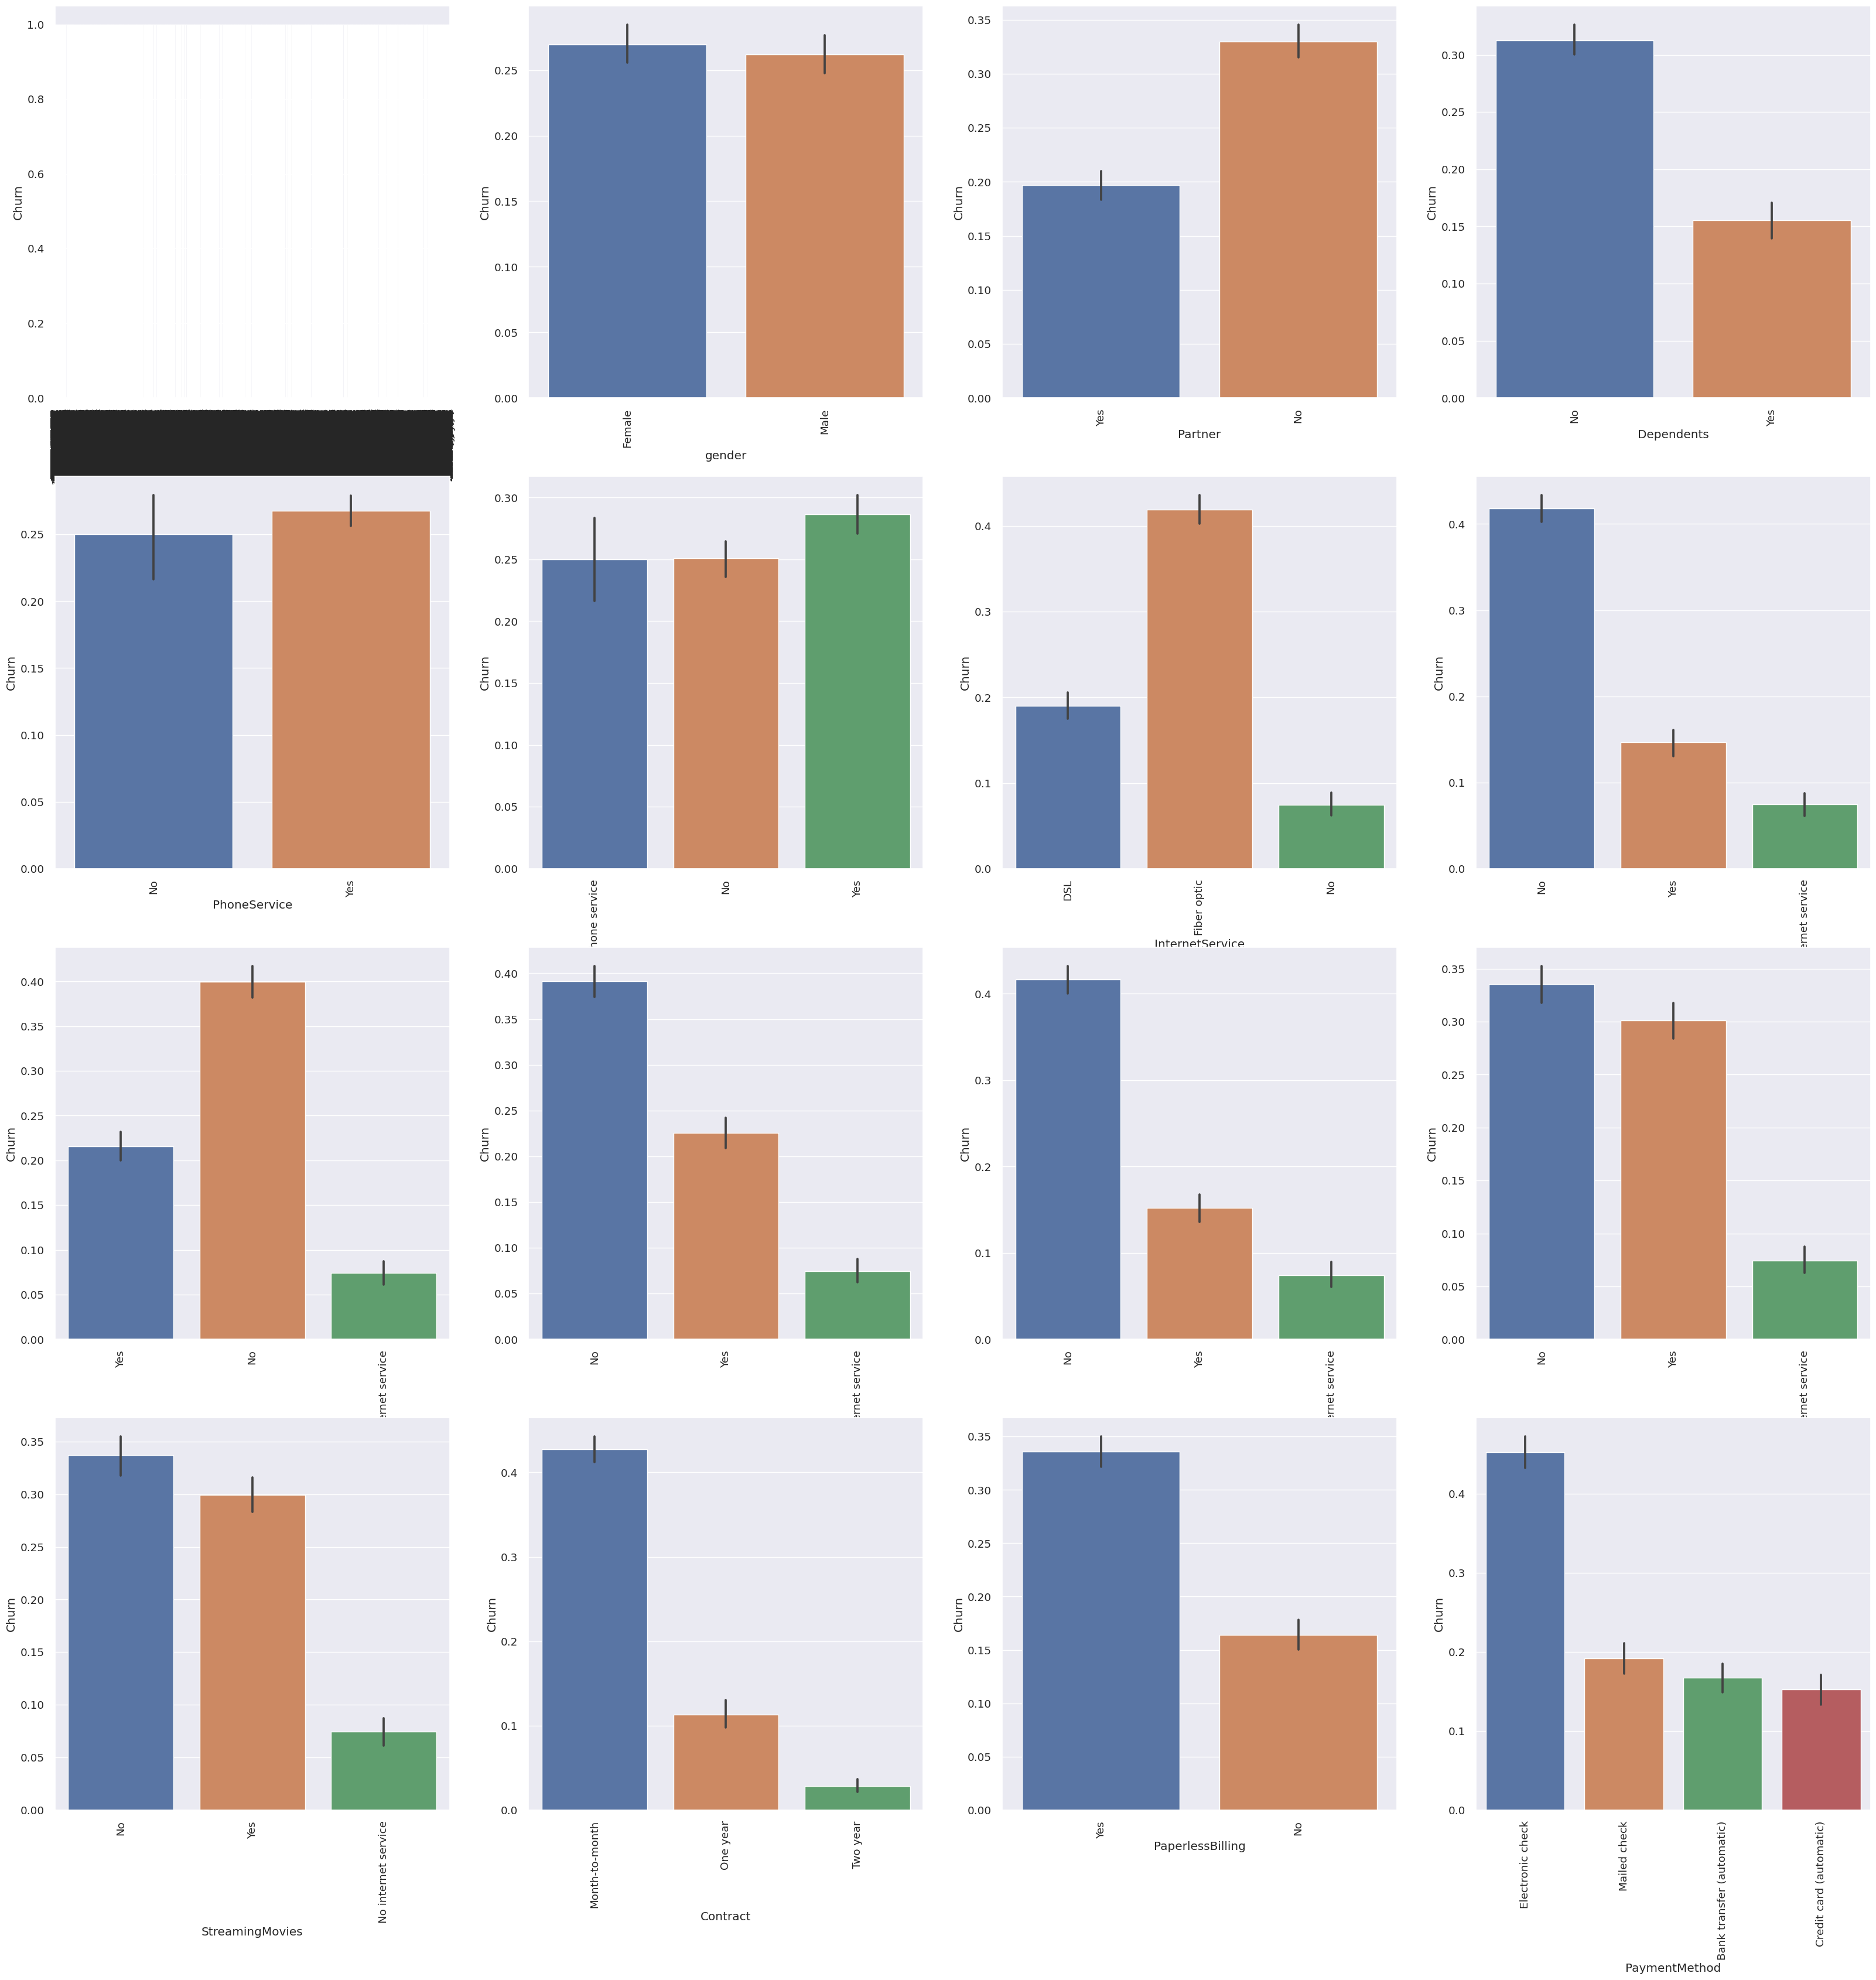

In [9]:
# Plotting the corrleation between the catigorical attributes and churn
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))
for i, column in enumerate(categorical_col, 1):
    plt.subplot(4, 4 ,i)
    g = sns.barplot(x=column, y='Churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn')
    plt.xlabel(f'{column}')

**Answer for Q1**:
Partner: If a customer has no partner they will most probably churn
Dependents: If a customer has no dependents they will most probably churn
Internet service: If a customer has fiber optic they will most probably churn
Online security: if a customer has no online security they will most probably churn
OnlineBackup: if the customer is not subscirbed to online backup they will most probably churn
DeviceProtection: if the customer doesn't have device protection they will most probably churn
TechSupport: if the customer doesn't have tech support they will most probably churn
StreamingTV: if the customer doesn't have Streaming TV they will most probably churn
Contract: people with a month to month contract type are most likely to churn
PaperlessBilling: customer with paperlessbilling will most likely to churn
Paymentmethod: people that use electronic check are most likely to churn

**Q2: Which payment method has the highest churn rate?**

**Visualization**

In [11]:

# Calculate the churn rate for each payment method
churn_by_payment_method = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)


# Print the payment method with the highest churn rate
highest_churn_payment_method = churn_by_payment_method.idxmax()
highest_churn_rate = churn_by_payment_method.max()


print(f"The payment method with the highest churn rate is '{highest_churn_payment_method}' with a churn rate of {highest_churn_rate:.2%}.")



The payment method with the highest churn rate is 'Electronic check' with a churn rate of 45.29%.


**Answer for Q2**: Electronic check with a churn rate of 45.31%

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

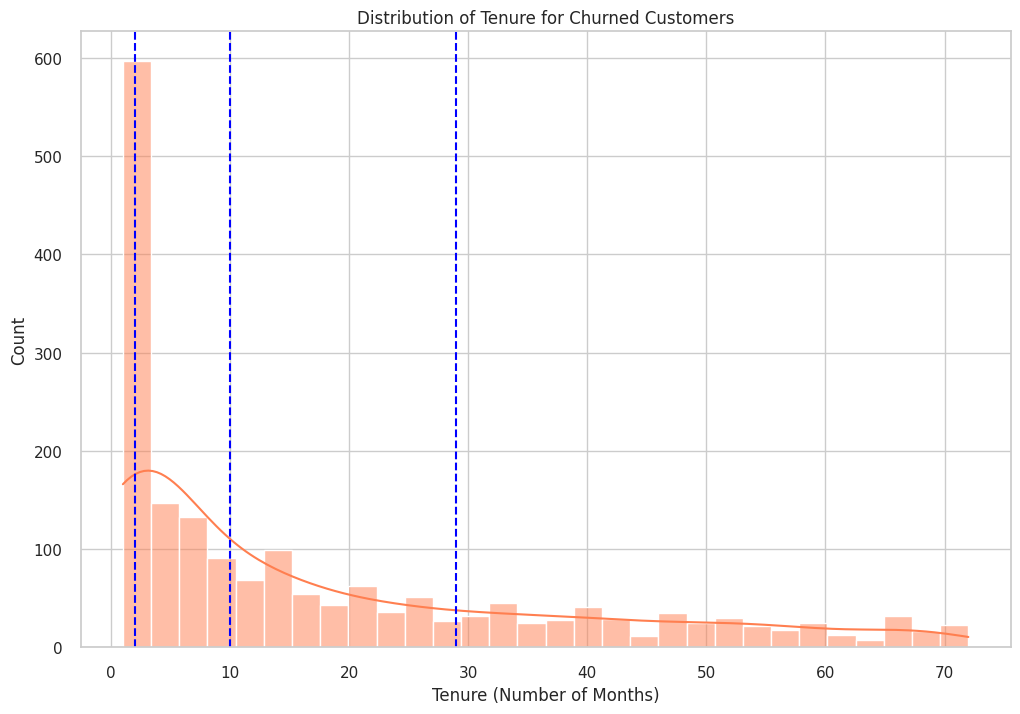

The most common tenure for churned customers is 1 months.


In [12]:
# Filter the dataset to include only churned customers
churned_customers = df[df['Churn'] == 1]


sns.set(style="whitegrid")

# Creating a graph to show the distribution of the ‘tenure’ attribute for customers who have churned.
plt.figure(figsize=(12, 8))
sns.histplot(data=churned_customers, x='tenure', bins=30, kde=True, color='coral')
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure (Number of Months)')
plt.ylabel('Count')

# dividing the graph into percentiles,  25%, 50%, and 75% percentiles
plt.axvline(x=churned_customers['tenure'].quantile(0.25), color='blue', linestyle='--')
plt.axvline(x=churned_customers['tenure'].quantile(0.50), color='blue', linestyle='--')
plt.axvline(x=churned_customers['tenure'].quantile(0.75), color='blue', linestyle='--')

plt.show()

#Finding out which tenure is common for customers to churn in
churned_tenure_mode = churned_customers['tenure'].mode().values[0]
print(f"The most common tenure for churned customers is {churned_tenure_mode} months.")

**Answer for Q3**: most customers are churned in the first month

## Data Preparation for Modelling

In [14]:
df_encoded = df.copy()

In [15]:
#specifying that contract is an ordinal categorical column being month to month is the shortest contract length and two year is the longest
df_encoded['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)
#we dropped Customerid because it is basically usless, gender doesnt effect whether the customer will churn or not, and the rest of attributes are not helpful
df_encoded.drop(['customerID','gender','TotalCharges','InternetService','StreamingMovies','StreamingTV'], axis='columns', inplace=True)
df_encoded = pd.get_dummies(df_encoded)
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   Churn                                    7032 non-null   int8   
 4   Partner_No                               7032 non-null   uint8  
 5   Partner_Yes                              7032 non-null   uint8  
 6   Dependents_No                            7032 non-null   uint8  
 7   Dependents_Yes                           7032 non-null   uint8  
 8   PhoneService_No                          7032 non-null   uint8  
 9   PhoneService_Yes                         7032 non-null   uint8  
 10  MultipleLines_No                         7032 no

In [16]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
4,0,2,70.70,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [17]:
#spliting the data into train dataset and a test dataset
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [19]:
import graphviz
from sklearn.tree import export_graphviz
# Generate the decision tree
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('tree')
graph

fastest route to churn


---
Contract_Month-to-month ≤ 0.5
gini = 0.391
samples = 4883
value = [3581, 1302]
class = No


---

MonthlyCharges ≤ 93.675
gini = 0.126
samples = 2174
value = [2027, 147]
class = No


---
Contract_One year ≤ 0.5
gini = 0.271
samples = 538
value = [451, 87]
class = No


---
MonthlyCharges ≤ 94.175
gini = 0.156
samples = 270
value = [247, 23]
class = No


---
PaperlessBilling_Yes ≤ 0.5
gini = 0.48
samples = 5
value = [2, 3]
class = Yes


---
gini = 0.0
samples = 2
value = [0, 2]
class = Yes




## Evaluation

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# function to print evaluation scores for a classifier
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
  #evaluating on the training set
    if train:
      # predictions on the training set
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

#evaluating on the test set
    elif train==False:
      #Prediction on the testing set
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [21]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.76%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.997514     0.997696  0.997562     0.997605      0.997562
recall        0.999170     0.993119  0.997562     0.996145      0.997562
f1-score      0.998341     0.995402  0.997562     0.996872      0.997560
support    3614.000000  1308.000000  0.997562  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3611    3]
 [   9 1299]]

Test Result:
Accuracy Score: 71.42%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.816600    0.465909  0.714218     0.641254      0.723359
recall        0.787605    0.511586  0.714218     0.649596      0.714218
f1-score      0.801840    0.487681  0.714218     0.644760      0.718313
support    1549.000000  561.000000  

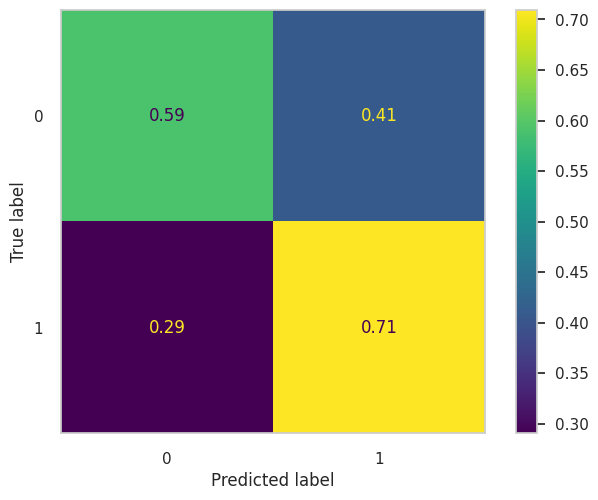

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate the confusion matrix for the test set predictions
cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)
# The visualization helps assess the model's performance by displaying the distribution of predicted and actual classes.

Accuracy score is 73% but there is class imbalance so its better to use recall and precision


---
percision is 53% meaing that the true postive cases were predicted correctly

---
recall is 47% meaing actual true positive cases were predicted correctly


In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score

 # predictions on the test set using the decision tree classifier
pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.4659090909090909
Recall:  0.5115864527629234
F1_score:  0.48768054375531006


## Bonus (Optional)

In [24]:
# Applying min-max Normalization on the numerical columns
df_encoded2= df_encoded.copy()
numerical_columns = ['tenure', 'MonthlyCharges']
df_encoded2[numerical_columns] = (

   df_encoded2[numerical_columns] - df_encoded2[numerical_columns].min()
) /(
    df_encoded2[numerical_columns].max() - df_encoded2[numerical_columns].min())

df_encoded2.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_encoded2.drop('Churn', axis=1)
y = df_encoded2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr_model = LogisticRegression( max_iter = 2000 )
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.7943127962085308